This is a visualization of my worout chart for few weeks. 

#Import dataset and pre processing

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes= True)
import matplotlib.pyplot as plt


df = pd.read_csv('Workout_FitNotes.csv')

In [14]:
df.head()

,Date,Exercise,Category,Weight (kgs),Reps,Distance,Distance Unit,Time,Comment
0,2021-01-16,Incline Dumbbell Bench Press,Chest,7.5,12.0,NaN,NaN,NaN,NaN
1,2021-01-16,Incline Dumbbell Bench Press,Chest,10.0,10.0,NaN,NaN,NaN,NaN
2,2021-01-16,Incline Dumbbell Bench Press,Chest,10.0,8.0,NaN,NaN,NaN,NaN
3,2021-01-16,Flat Dumbbell Bench Press,Chest,10.0,12.0,NaN,NaN,NaN,NaN
4,2021-01-16,Flat Dumbbell Bench Press,Chest,12.5,10.0,NaN,NaN,NaN,NaN


In [15]:
df.describe()

,Weight (kgs),Reps,Distance,Comment
count,545.000000,545.000000,7.000000,0.0
mean,18.885321,9.038532,643.428571,NaN
std,12.227514,2.392617,851.665204,NaN
min,0.000000,2.000000,1.000000,NaN
25%,10.000000,7.000000,1.000000,NaN
50%,15.000000,9.000000,1.000000,NaN
75%,30.000000,11.000000,1250.000000,NaN
max,60.000000,15.000000,2000.000000,NaN


Let us first focus on the exercises with reps sets and weights since they form the majority of the Data frame.

In [18]:
df_ = df[["Date","Exercise","Category","Weight (kgs)","Reps"]]
df_ = df_.rename(columns = {"Weight (kgs)":"Weights"})
df_['Date']= pd.to_datetime(df_['Date'])
df_.head()

,Date,Exercise,Category,Weights,Reps
0,2021-01-16,Incline Dumbbell Bench Press,Chest,7.5,12.0
1,2021-01-16,Incline Dumbbell Bench Press,Chest,10.0,10.0
2,2021-01-16,Incline Dumbbell Bench Press,Chest,10.0,8.0
3,2021-01-16,Flat Dumbbell Bench Press,Chest,10.0,12.0
4,2021-01-16,Flat Dumbbell Bench Press,Chest,12.5,10.0


Lets look at the different exercises that were performed

In [19]:
df_.Exercise.unique()

array(['Incline Dumbbell Bench Press', 'Flat Dumbbell Bench Press',
       'Decline Dumbbell Press', 'Seated Machine Fly', 'Rope Push Down',
       'Dumbbell Overhead Triceps Extension', 'Lat Pulldown',
       'Seated Cable Row', 'Dumbbell Row', 'Cable Curl', 'Dumbbell Curl',
       'Preacher Curl', 'Hammer Curls', 'Front Dumbbell Raise',
       'Barbell Shrugs', 'Walking', 'Deadlift', 'Barbell Squat',
       'Leg Extension Machine', 'Seated Leg Curl Machine', 'Home Workout',
       'Dumbbell Skullcrusher', 'EZ-Bar Skullcrusher', 'Overhead Press',
       'Lateral Dumbbell Raise', 'Arnold Dumbbell Press',
       'Rear Delt Machine Fly', 'Lying Triceps Extension',
       'Cable Lateral Raise', 'Cable Face Pull', 'Shrugs', 'Barbell Curl',
       'Reverse Grip Cable Curl', 'Running (Outdoor)',
       'Concentration Curl', 'Front Dumbbell Squats',
       'Standing Calf Raise Dumbbell', 'Reverse Grip Pushdown', 'Pull Up'],
      dtype=object)

A quick thing to note would be that there are a mix of single handed and double handed exercises in the pool. Hence to calculate the real volume of exercised, we will have to multiply the weights or reps or sets of single handed exercises by 2

i.e performing a dumbell curl for 10 reps with 10 kgs in both hands would mean a total volume of 10*10*2 and not 10*10

Lets address this right away by identifying the single handed exercises in this list.

['Incline Dumbbell Bench Press', 'Flat Dumbbell Bench Press','Decline Dumbbell Press', 'Dumbbell Row','Dumbbell Curl','Preacher Curl', 'Hammer Curls', 'Front Dumbbell Raise','Dumbbell Skullcrusher','Lateral Dumbbell Raise', 'Arnold Dumbbell Press','Lying Triceps Extension','Cable Lateral Raise','Shrugs','Concentration Curl', 'Standing Calf Raise Dumbbell']

In this case, i will not multiply weight or rep by 2, to avoid making the weights look unusually hight as it will affect later visualizations, also avoiding multiplying reps by two to prevent messing with the Records visualization(Max weight or max rep counts).
Instead, lets create a new column to identify if it is a single handed exercise, to help calculate volume properly.

In [29]:
two_handed_exercises = ['Incline Dumbbell Bench Press', 'Flat Dumbbell Bench Press',
                        'Decline Dumbbell Press', 'Dumbbell Row','Dumbbell Curl','Preacher Curl', 
                        'Hammer Curls', 'Front Dumbbell Raise','Dumbbell Skullcrusher',
                        'Lateral Dumbbell Raise', 'Arnold Dumbbell Press','Lying Triceps Extension',
                        'Cable Lateral Raise','Shrugs','Concentration Curl', 'Standing Calf Raise Dumbbell']
df_['hand_count']=1;
for i in two_handed_exercises:
    df_['hand_count']= np.where(df_['Exercise']== i, df_['hand_count']+1,df_['hand_count'])
df_


,Date,Exercise,Category,Weights,Reps,hand_count
0,2021-01-16,Incline Dumbbell Bench Press,Chest,7.5,12.0,2
1,2021-01-16,Incline Dumbbell Bench Press,Chest,10.0,10.0,2
2,2021-01-16,Incline Dumbbell Bench Press,Chest,10.0,8.0,2
3,2021-01-16,Flat Dumbbell Bench Press,Chest,10.0,12.0,2
4,2021-01-16,Flat Dumbbell Bench Press,Chest,12.5,10.0,2
...,...,...,...,...,...,...
547,2021-04-02,Cable Curl,Biceps,40.0,8.0,1
548,2021-04-02,Cable Curl,Biceps,40.0,6.0,1
549,2021-04-02,Preacher Curl,Biceps,7.5,12.0,2
550,2021-04-02,Preacher Curl,Biceps,10.0,8.0,2


In [42]:
df_['volume']=df_['Weights']*df_['Reps']*df_['hand_count']
df_.dropna(inplace=True)

# Categorising

Quickly catogerizing workouts based on the primary muscle group and visualizing how they fare against each other in term of 
i) Training volume 
ii)Sets per category
iii) Different workouts per category

In [43]:
df_category = df_.groupby('Category')['volume'].sum()
df_category

Category
Back         24176.0
Biceps       21464.0
Chest        24900.0
Legs          9600.0
Shoulders    20000.0
Triceps      15090.0
Name: volume, dtype: float64

The above table shows the total volume for different category of exercises, lets plot this as a donut chart for better visualization

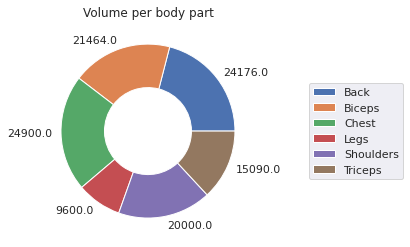

In [56]:
plt.pie(df_category,labels=df_category,wedgeprops=dict(width = 0.5))
plt.title("Volume per body part")
plt.legend(df_category.index,loc="center right",bbox_to_anchor=(1.2, 0, 0.5, 1))
plt.show()

One obvious insight here is the lack of volume for leg workouts. But this is probably due to my knee injury, i.e Number of workouts for leg is considerably lower , hence the total volume is lower. 

Lets see if this assumption is true by plotting the average volume per workout

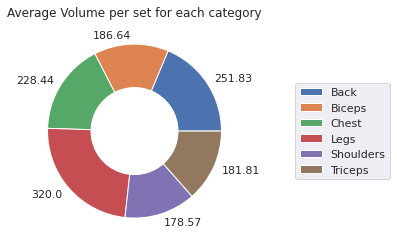

In [60]:
df_mean_volume_per_category = df_.groupby('Category')['volume'].mean().round(decimals = 2)
plt.pie(df_mean_volume_per_category,labels=df_mean_volume_per_category,wedgeprops=dict(width = 0.5))
plt.title("Average Volume per set for each category")
plt.legend(df_mean_volume_per_category.index,loc="center right",bbox_to_anchor=(1.2, 0, 0.5, 1))
plt.show()

Contrasting to the earlier plot, Legs have the highest average volume per set, which means i was loading my legs much more than other workouts. Hence out assumption that the volume was low because of the number of workouts being low seems correct. Lets count the number of workouts anyways.

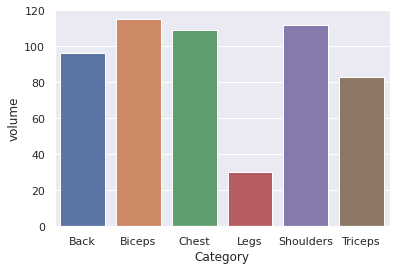

In [70]:
df_category_count = df_.groupby('Category')['volume'].count()
sns.barplot(x = df_category_count.index, y=df_category_count )

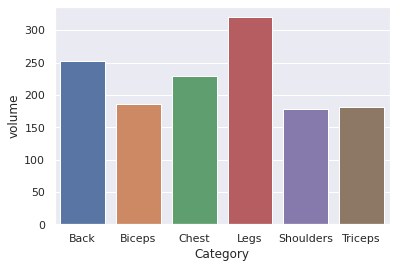

In [73]:
sns.barplot(x=df_mean_volume_per_category.index, y=df_mean_volume_per_category)

Thus proving our assumption

Now lets look deeper within each categories to analyze different workouts performed in each category.

In [107]:
c= pd.crosstab(df_['Category'],df_['Exercise'])
c

Exercise,Arnold Dumbbell Press,Barbell Curl,Barbell Shrugs,Barbell Squat,Cable Curl,Cable Face Pull,Cable Lateral Raise,Concentration Curl,Deadlift,Decline Dumbbell Press,Dumbbell Curl,Dumbbell Overhead Triceps Extension,Dumbbell Row,Dumbbell Skullcrusher,EZ-Bar Skullcrusher,Flat Dumbbell Bench Press,Front Dumbbell Raise,Front Dumbbell Squats,Hammer Curls,Incline Dumbbell Bench Press,Lat Pulldown,Lateral Dumbbell Raise,Leg Extension Machine,Lying Triceps Extension,Overhead Press,Preacher Curl,Pull Up,Rear Delt Machine Fly,Reverse Grip Cable Curl,Reverse Grip Pushdown,Rope Push Down,Seated Cable Row,Seated Leg Curl Machine,Seated Machine Fly,Shrugs,Standing Calf Raise Dumbbell
Category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Back,0,0,0,0,0,0,0,0,11,0,0,0,36,0,0,0,0,0,0,0,32,0,0,0,0,0,8,0,0,0,0,9,0,0,0,0
Biceps,0,10,0,0,31,0,0,3,0,0,21,0,0,0,0,0,0,0,24,0,0,0,0,0,0,14,0,0,12,0,0,0,0,0,0,0
Chest,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,33,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0
Legs,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,9,0,0,0,0,0,0,0,0,0,9,0,0,3
Shoulders,26,0,3,0,0,3,22,0,0,0,0,0,0,0,0,0,9,0,0,0,0,8,0,0,9,0,0,24,0,0,0,0,0,0,8,0
Triceps,0,0,0,0,0,0,0,0,0,0,0,25,0,1,2,0,0,0,0,0,0,0,0,12,0,0,0,0,0,10,33,0,0,0,0,0


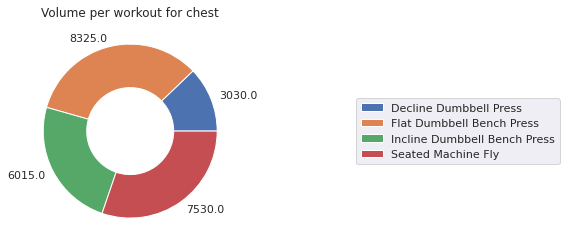

In [124]:
df_chest = df_[(df_.Category == "Chest")]
df_chest.set_index('Date',inplace=True)
chest_breakdown = df_chest.groupby('Exercise')['volume'].sum()
plt.pie(chest_breakdown,labels=chest_breakdown,wedgeprops=dict(width = 0.5))
plt.title("Volume per workout for chest")
plt.legend(chest_breakdown.index,loc="center right",bbox_to_anchor=(2, 0, 0.5, 1))
plt.show()

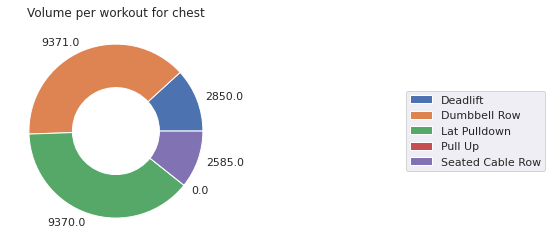

In [125]:
df_back = df_[(df_.Category == "Back")]
df_back.set_index('Date',inplace=True)
back_breakdown = df_back.groupby('Exercise')['volume'].sum()
plt.pie(back_breakdown,labels=back_breakdown,wedgeprops=dict(width = 0.5))
plt.title("Volume per workout for Back")
plt.legend(back_breakdown.index,loc="center right",bbox_to_anchor=(2, 0, 0.5, 1))
plt.show()

Bulk of the Volme omes from Lat pulldown and Dubbell row, inspite of having heavy lifts like deadlift. This is probably because of the nuber of workouts, similar to what we saw in the case of Legs.

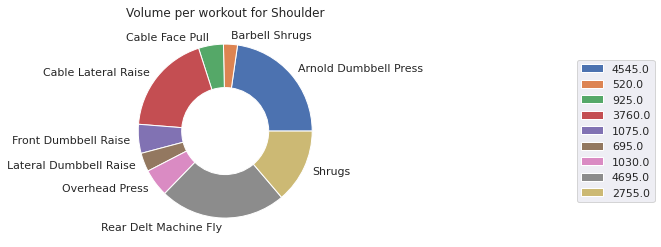

In [135]:
df_shoulder = df_[(df_.Category == "Shoulders")]
df_shoulder.set_index('Date',inplace=True)
df_shoulder
shoulder_breakdown = df_shoulder.groupby('Exercise')['volume'].sum()
plt.pie(shoulder_breakdown,labels=shoulder_breakdown.index,wedgeprops=dict(width = 0.5))
plt.title("Volume per workout for Shoulder")
plt.legend(shoulder_breakdown,loc="center right",bbox_to_anchor=(2, 0, 0.5, 1))
plt.show()

Shoulder exercises have a lot of different workouts, hence the decision to label with the index instead of the volume for better readability. We can see that the bulk of all volume comes from 3 exercises(Cable lateral raise, Arnold Dumbell press and Rear delt machine fly)

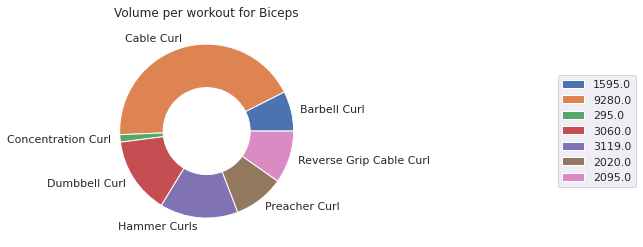

In [137]:
df_biceps = df_[(df_.Category == "Biceps")]
df_biceps.set_index('Date',inplace=True)
bicep_breakdown = df_biceps.groupby('Exercise')['volume'].sum()
plt.pie(bicep_breakdown,labels=bicep_breakdown.index,wedgeprops=dict(width = 0.5))
plt.title("Volume per workout for Biceps")
plt.legend(bicep_breakdown,loc="center right",bbox_to_anchor=(2, 0, 0.5, 1))
plt.show()

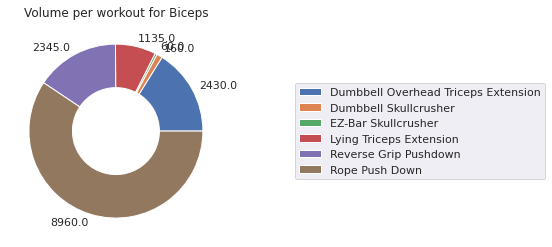

In [140]:
df_triceps = df_[(df_.Category == "Triceps")]
df_triceps.set_index('Date',inplace=True)
tricep_breakdown = df_triceps.groupby('Exercise')['volume'].sum()
plt.pie(tricep_breakdown,labels=tricep_breakdown,wedgeprops=dict(width = 0.5))
plt.title("Volume per workout for Biceps")
plt.legend(tricep_breakdown.index,loc="center right",bbox_to_anchor=(2, 0, 0.5, 1))
plt.show()

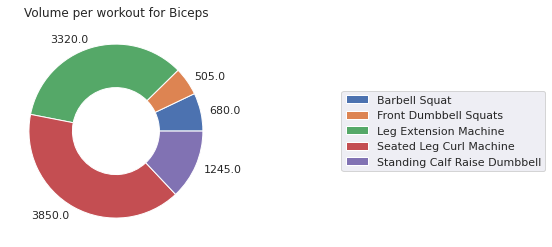

In [141]:
df_legs = df_[(df_.Category == "Legs")]
df_legs.set_index('Date',inplace=True)
leg_breakdown = df_legs.groupby('Exercise')['volume'].sum()
plt.pie(leg_breakdown,labels=leg_breakdown,wedgeprops=dict(width = 0.5))
plt.title("Volume per workout for Biceps")
plt.legend(leg_breakdown.index,loc="center right",bbox_to_anchor=(2, 0, 0.5, 1))
plt.show()

The huge difference in volume for seated exercise vs standing exercise can be credited to the leg injury i mentioned before.

#Time series analysis

Lets see how the workouts progressed over the period of time

In [173]:
df_month = df_.tail(374)

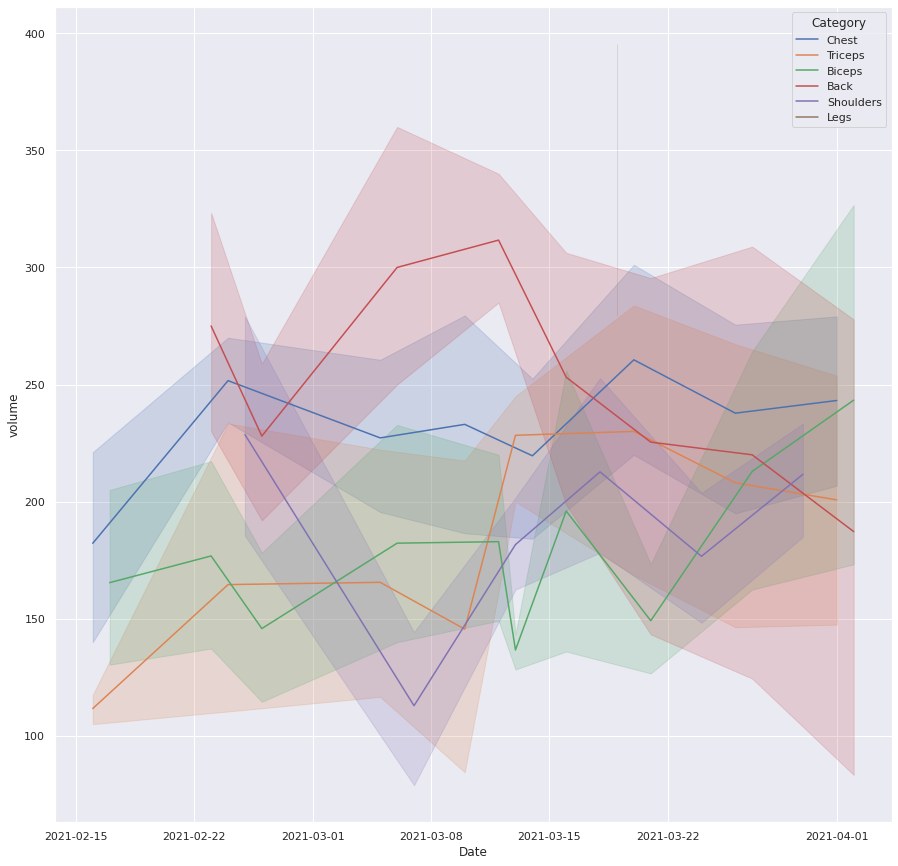

In [182]:
fig = plt.gcf();
fig.set_size_inches(15,15)
sns.lineplot(x='Date',y='volume',hue='Category',data = df_month)

Though we see an upward trend in the above grapgh, it is cluttered and not very insightful.

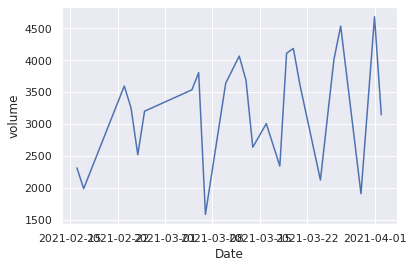

In [250]:
df_date_vol = df_.groupby('Date')['volume'].sum()
df_date_vol = df_date_vol.tail(24)
sns.lineplot(x=df_date_vol.index,y=df_date_vol)

There is a general upward trend in workout volumes. The fluctuations are probably due to workouts like shoulder which were low volume and back which were high volume workouts. The general trend however shows an increase in volume over the time.

In [231]:
chest = df_chest.groupby('Date')['volume'].sum()
bicep = df_biceps.groupby('Date')['volume'].sum()
tricep = df_triceps.groupby('Date')['volume'].sum()
back = df_back.groupby('Date')['volume'].sum()
shoulder = df_shoulder.groupby('Date')['volume'].sum()
legs = df_legs.groupby('Date')['volume'].sum()

chest.reset_index(inplace = True, drop = True)
bicep.reset_index(inplace = True, drop = True)
tricep.reset_index(inplace = True, drop = True)
back.reset_index(inplace = True, drop = True)
shoulder.reset_index(inplace = True, drop = True)

In [238]:
df_time = pd.concat([chest,bicep,back,tricep,shoulder,legs],axis=1, keys=['Chest','Bicep','Back','Tricep','Shoulder'],ignore_index=False)
df_time = df_time.head(-5)
df_time

,Chest,Bicep,Back,Tricep,Shoulder
0,2500.0,2270.0,2140.0,1170.0,1170.0
1,2940.0,920.0,750.0,1530.0,1620.0
2,1385.0,1240.0,2580.0,1527.5,720.0
3,1640.0,590.0,3395.0,670.0,3850.0
4,2265.0,1985.0,1650.0,987.5,2515.0
5,2045.0,1945.0,1596.0,1490.0,1580.0
6,2330.0,1604.0,1800.0,1310.0,2180.0
7,2635.0,2005.0,1870.0,685.0,2340.0
8,2345.0,2195.0,2025.0,1840.0,2120.0


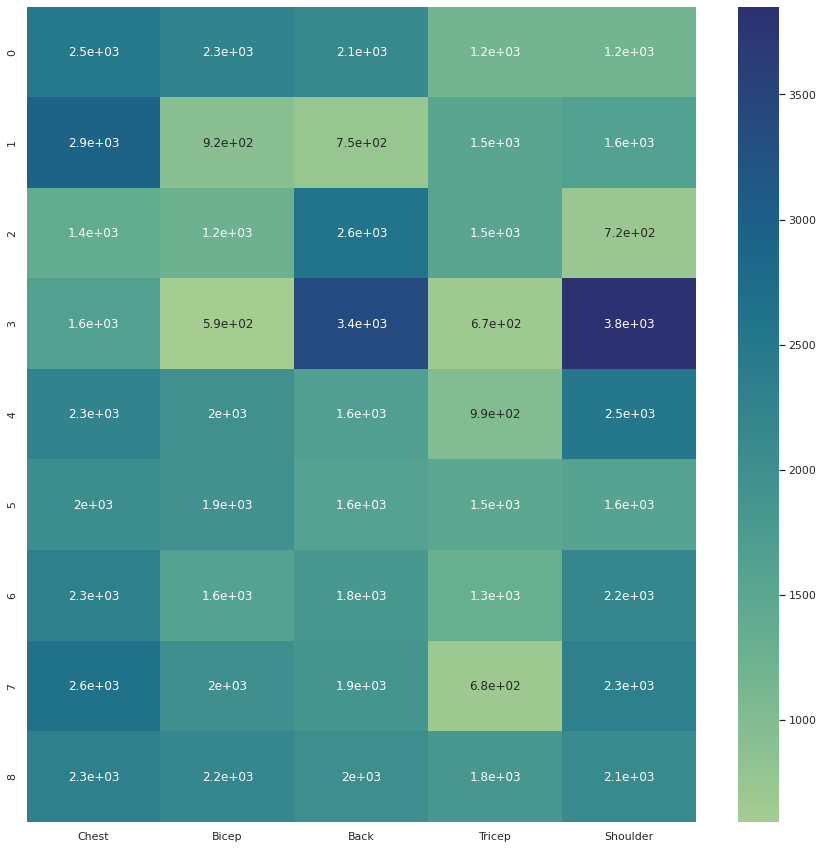

In [243]:
df_time = df_time.fillna(0)
fig = plt.gcf();
fig.set_size_inches(15,15)
sns.heatmap(df_time, annot=True,cmap= 'crest')

Few outliers aside, the chart is getting darker as we move down, indicating a gain in workout volumes as time progresses.

In [263]:
!pip install calmap
import calmap


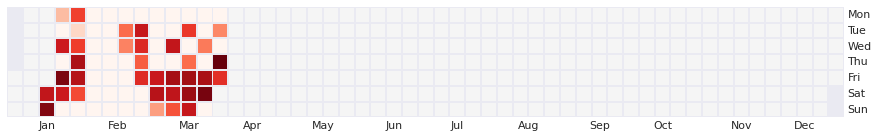

In [267]:
fig = plt.gcf();
fig.set_size_inches(15,15)
calmap.yearplot(df_.groupby('Date')['volume'].sum(), year=2021)

Here is a calendar map of which days i did a workout, and the color dipicting overall volume of the workout. You can notice a 2 week gap in Feb, which was due to a bad injury.

Another fun insight: I rarely workout on a Monday :D

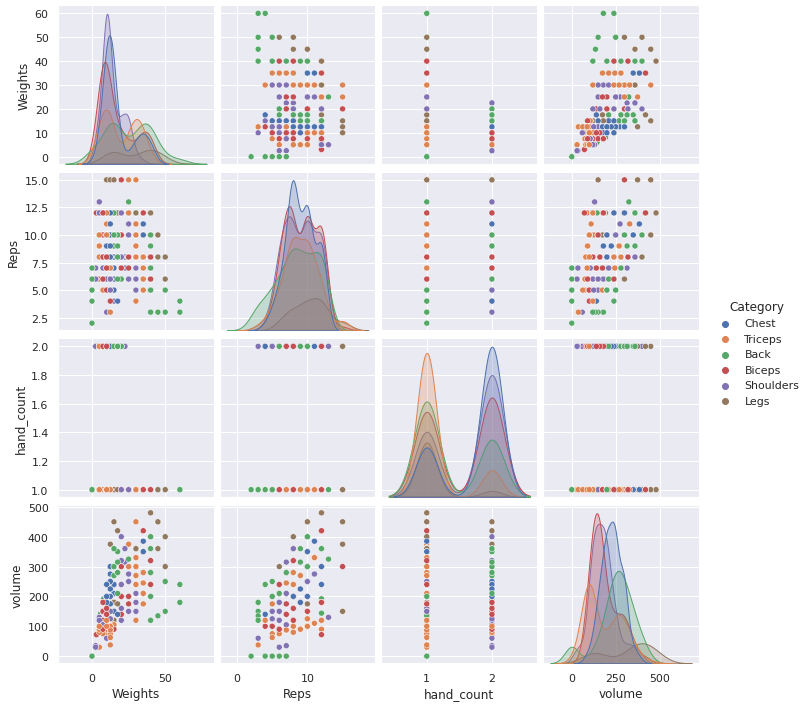

In [251]:
sns.pairplot(df_,hue='Category')

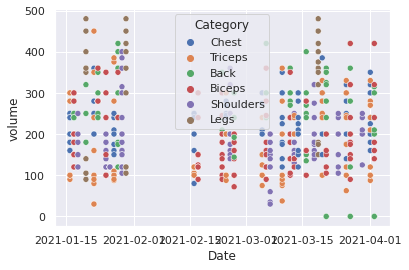

In [258]:
sns.scatterplot(x='Date', y= 'volume', data =df_, hue='Category')